In [46]:
#Declare all the libaries

import imageio.v2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erfc

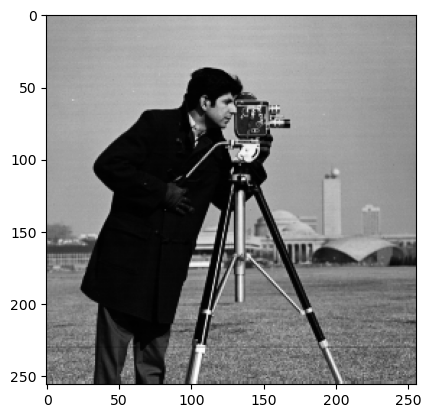

In [47]:
#Read an image and converts into an 2D array of 256*256 with value ranging from grayscale(0-255)

img = imageio.v2.imread("cameraman.png")
plt.imshow(img,cmap='gray')
plt.show()

#reshape the array 2D to 1D, now size is 256*256=65536 
img =img.reshape(-1)

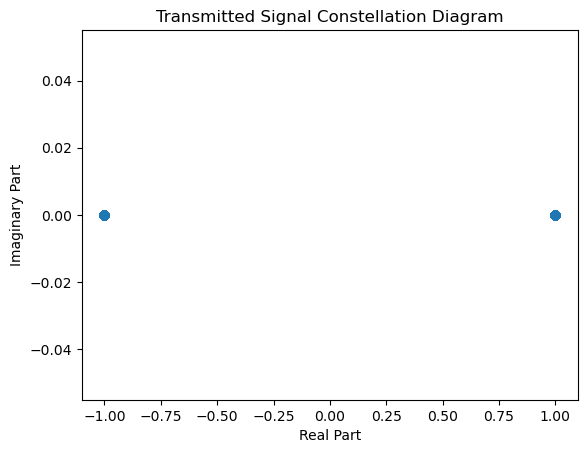

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\USER\AppData\Local\Temp\ipykernel_2532\723919803.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('image.png')


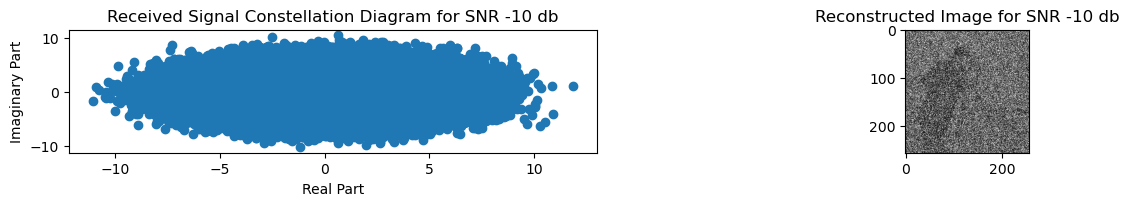

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


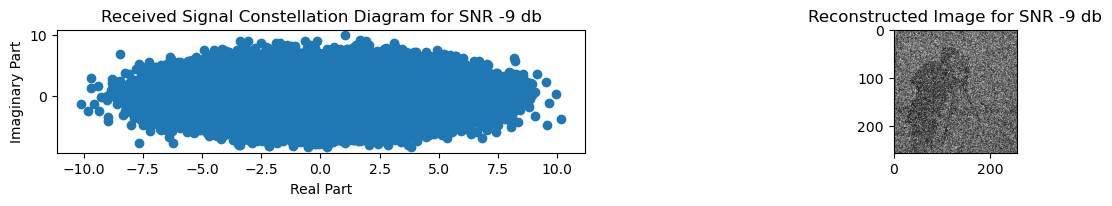

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


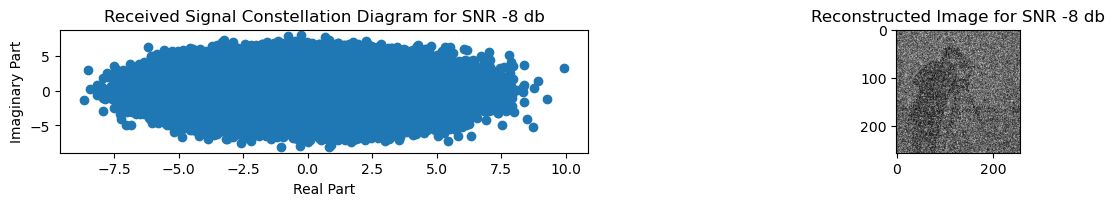

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


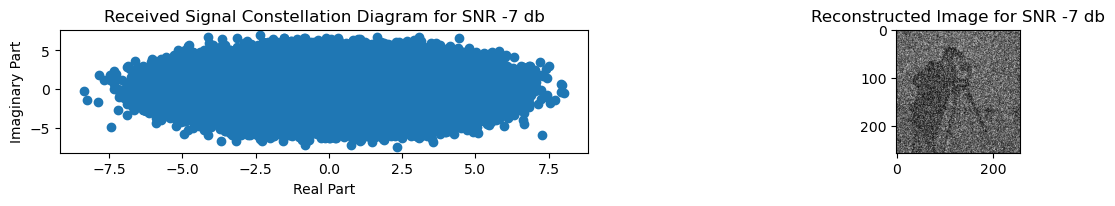

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


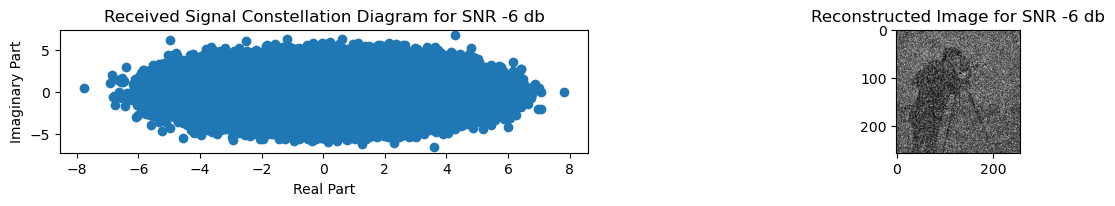

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


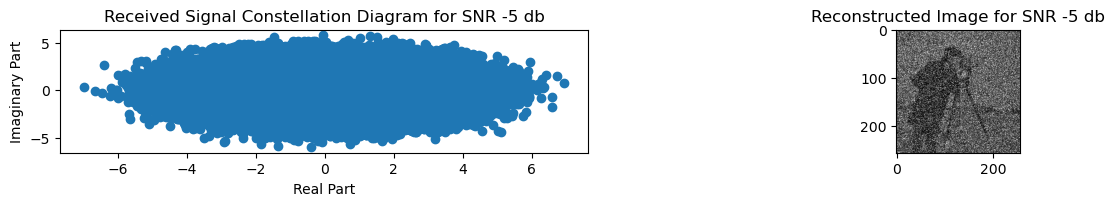

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


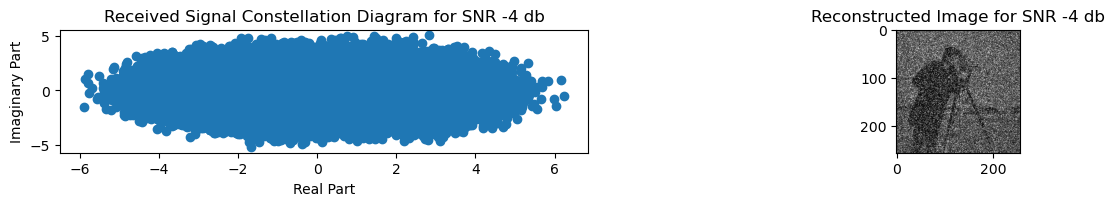

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


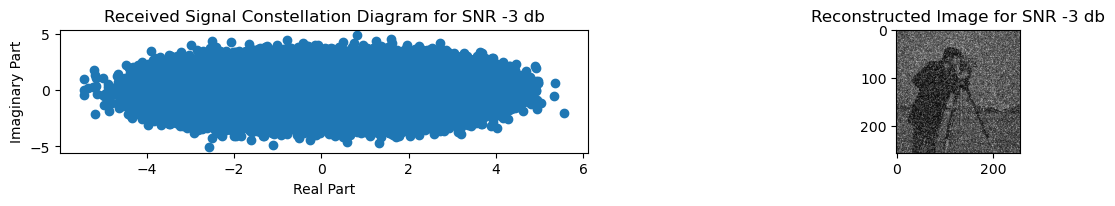

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


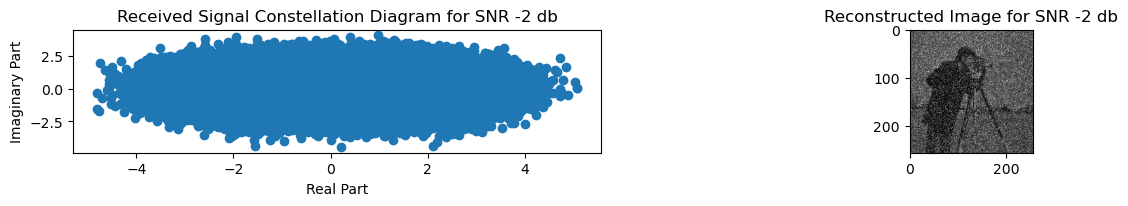

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


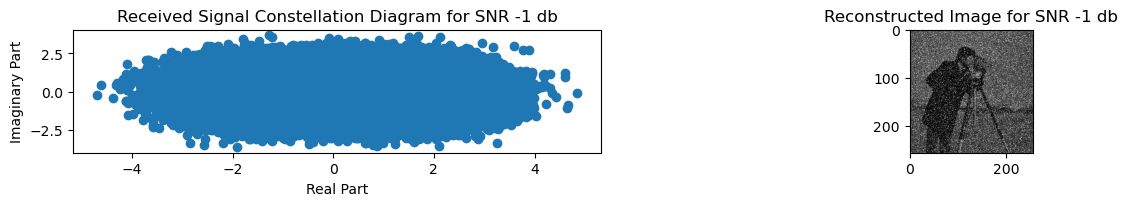

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


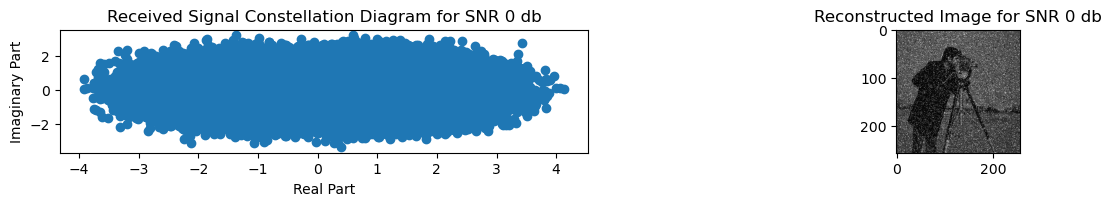

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


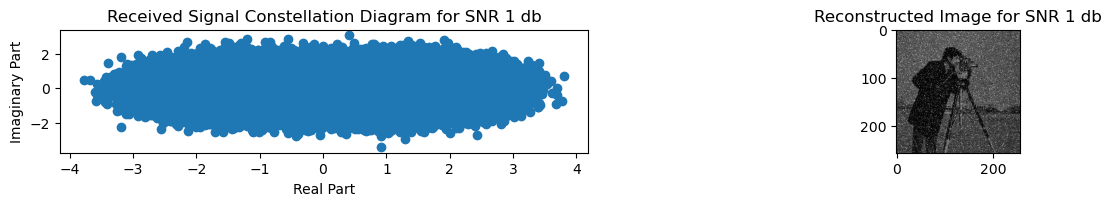

Lossy conversion from int32 to uint8. Range [0, 509]. Convert image to uint8 prior to saving to suppress this warning.


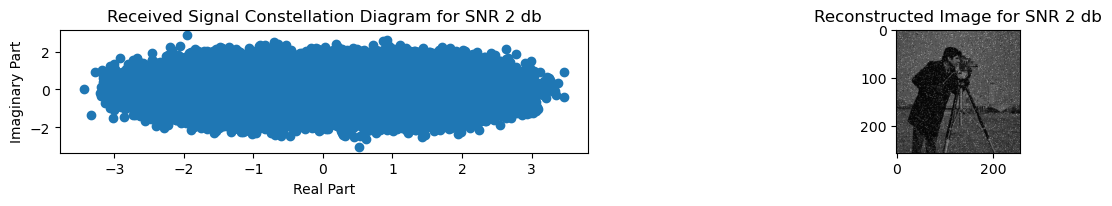

Lossy conversion from int32 to uint8. Range [0, 509]. Convert image to uint8 prior to saving to suppress this warning.


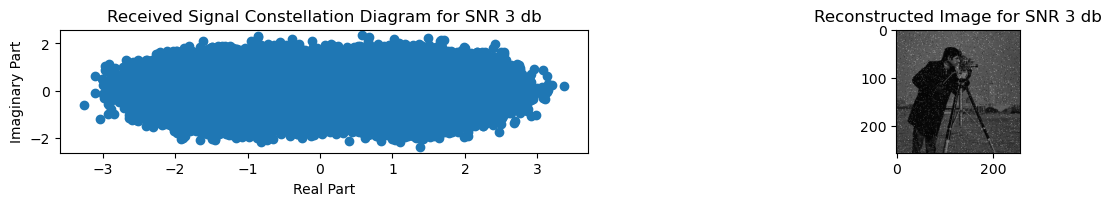

Lossy conversion from int32 to uint8. Range [0, 511]. Convert image to uint8 prior to saving to suppress this warning.


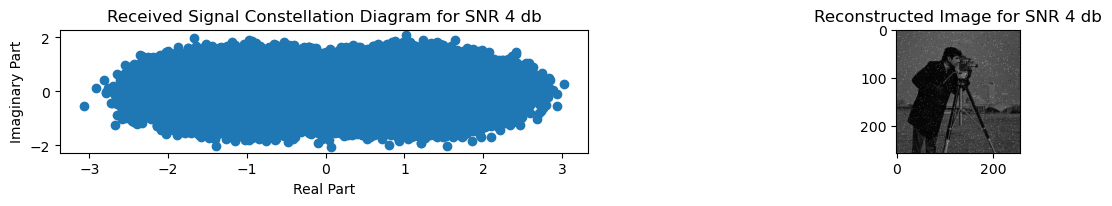

Lossy conversion from int32 to uint8. Range [0, 495]. Convert image to uint8 prior to saving to suppress this warning.


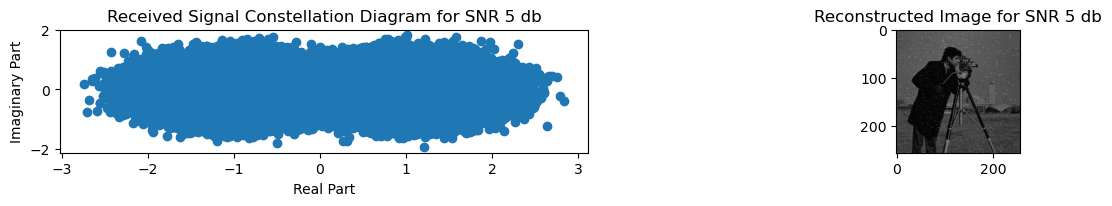

Lossy conversion from int32 to uint8. Range [0, 498]. Convert image to uint8 prior to saving to suppress this warning.


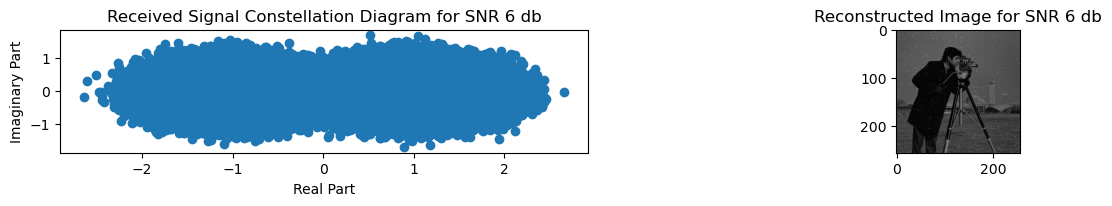

Lossy conversion from int32 to uint8. Range [0, 440]. Convert image to uint8 prior to saving to suppress this warning.


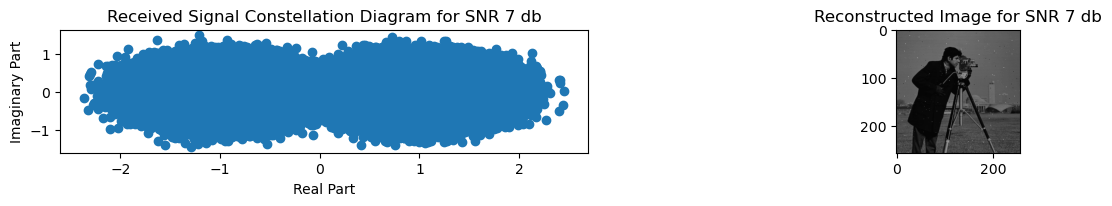

Lossy conversion from int32 to uint8. Range [0, 437]. Convert image to uint8 prior to saving to suppress this warning.


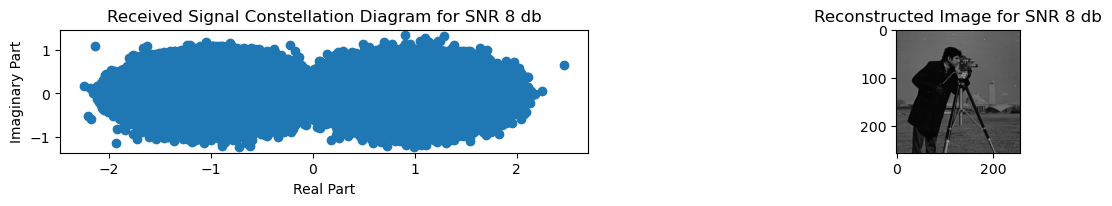

Lossy conversion from int32 to uint8. Range [7, 460]. Convert image to uint8 prior to saving to suppress this warning.


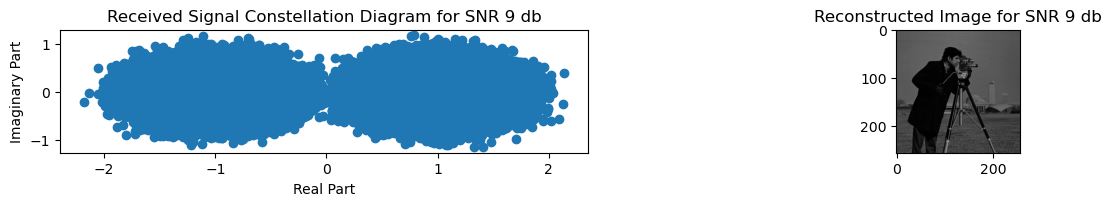

Lossy conversion from int32 to uint8. Range [7, 253]. Convert image to uint8 prior to saving to suppress this warning.


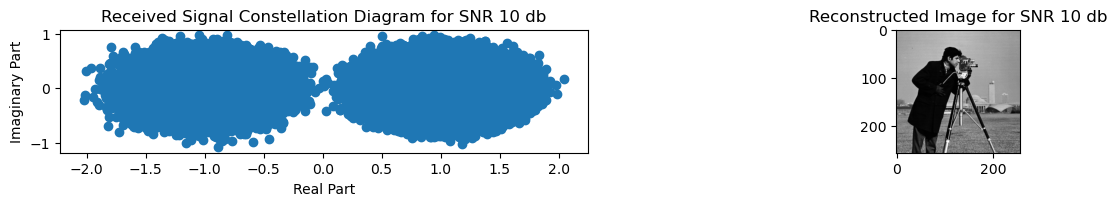

In [48]:

#convert the array numbers(0-255) into 8 bits, Total array size=65884*8=524288
binary_image = ''.join(np.array([(np.binary_repr(i,width=9)) for i in img]).reshape(-1))

#Map the MPSK bits to symbols
M=2
m=int(math.log2(M))
bits=[(2*np.pi*int(binary_image[j:j+m],2))/M for j in range(0,len(binary_image),m)]
transmitted_image=np.array([round(math.cos(a))+1J*round(math.sin(a)) for a in bits])

# plot the constellation 

plt.scatter(transmitted_image.real, transmitted_image.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Transmitted Signal Constellation Diagram')
plt.show()

#Generate AWGN noise and add with transmitted_signal
SER_sim=list()
BER_sim=list()
l=2

for s in range(-10,11,1):
    fig, ax = plt.subplots(1, 2, figsize=(15,40))
    snr_db = s #s

    # Calculate the SNR in linear scale
    snr = 10 ** (snr_db / 10)

#         # Generate complex Gaussian noise with zero mean and unit variance
#         noise = np.random.normal(loc=0, scale=np.sqrt(snr/2),size=(len(transmitted_image))) +1j * np.random.normal(loc=0,scale=np.sqrt(snr/2), size=(len(transmitted_image)))

#         # Scale the noise to match the required SNR
#         noise_power = np.var(noise)
#         signal_power = 1
#         scale_factor = np.sqrt(signal_power / (snr * noise_power))
#         noise = noise * scale_factor



    snr = 10**(snr_db/10) #snr in linear scale
    noise = np.random.normal(0, np.sqrt(1/(snr*2)), len(transmitted_image)) + 1j*np.random.normal(0,np.sqrt(1/(snr*2)), len(transmitted_image))

    # Add the noise to the symbols to create the received signal
    received_signal = transmitted_image + noise
    


    plt.subplot(21,2,2*(s+10)+1)
    plt.scatter(received_signal.real, received_signal.imag)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Received Signal Constellation Diagram for SNR %s db' %s)

    #Decode the recieved signal
    symbol_matrix=np.array([round(math.cos(2*np.pi*i/M))+1J*round(math.sin(2*np.pi*i/M)) for i in range(M)])
    bit_matrix=np.array([np.binary_repr(i,m) for i in range(M)])

    #convert to binary symbols
    ml_decoded=np.array([symbol_matrix[np.abs(symbol_matrix -i).argmin()] for i in received_signal])

    #convert to 8 bit code
    recieved_bits=''.join([bit_matrix[np.abs(symbol_matrix -i).argmin()] for i in received_signal])

    #convert the 8 bit code to integer 

    recieved_image=np.array([int(recieved_bits[i:i+9],2) for i in range(0,len(recieved_bits),9)])
    recieved_image=np.reshape(recieved_image,(256,256))
    imageio.imwrite('image.png',recieved_image) 
    image = imageio.imread('image.png')
    plt.subplot(21,2,l)
    l =l+2
    plt.title('Reconstructed Image for SNR %s db'%s)
    plt.imshow(image,cmap='gray')
    plt.show()

    #Calculate the BER uisng simulation
    symbol_error=0
    bit_error=0
    for i in range(len(ml_decoded)):
        if ml_decoded[i]!=transmitted_image[i]:
            symbol_error+=1
    for i in range(len(binary_image)):        
        if binary_image[i]!=recieved_bits[i]:
            bit_error+=1   
    SER_sim+=[symbol_error/len(ml_decoded)]
    BER_sim+=[bit_error/len(recieved_bits)]



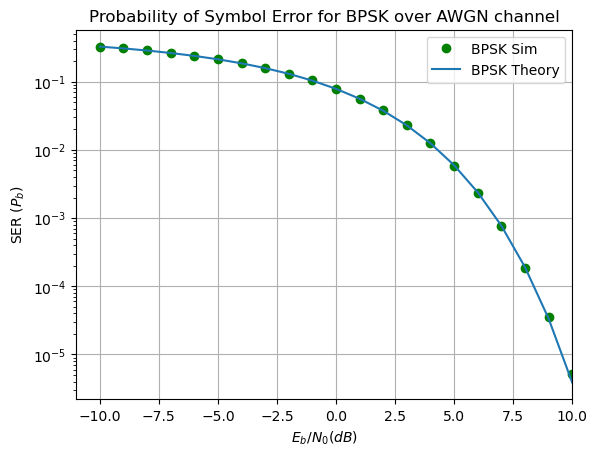

In [49]:
#Calculating the BER theoritically 

snr_db=np.arange(-10,11,1)
SER_theory = 0.5*erfc(np.sqrt((10**(snr_db/10)))*math.sin(np.pi/M))

#Plot the BER vs SNR Curve
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(snr_db,SER_sim,color='g',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(snr_db,SER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('SER ($P_b$)')
ax.set_title('Probability of Symbol Error for BPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11,10)
ax.grid(True)
plt.show()

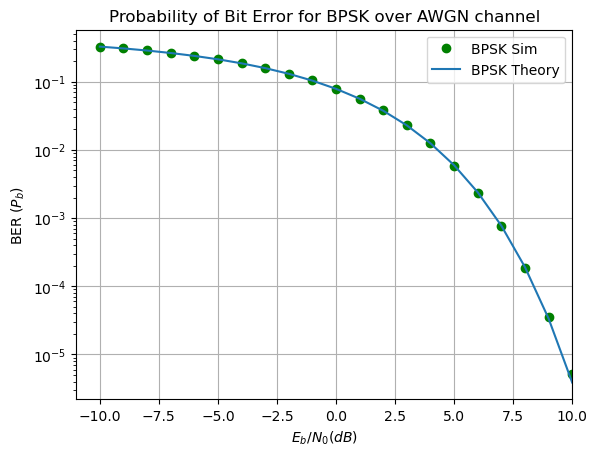

In [50]:
snr_db=np.arange(-10,11,1)
BER_theory = 0.5*erfc(np.sqrt((10**(snr_db/10)))*np.sin(np.pi/M))

#Plot the BER vs SNR Curve
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(snr_db,BER_sim,color='g',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(snr_db,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11,10)
ax.grid(True)
plt.show()